# Plotting 5 Sensors
---
Examples of 5 minute videos. Feel free to choose your own.
1. RELAXED: https://www.youtube.com/watch?v=i50ZAs7v9es
2. SCARY: https://www.youtube.com/watch?v=UY_9dJBM388
3. SAD: https://www.youtube.com/watch?v=jgTDK34mka8
4. FUNNY: https://www.youtube.com/watch?v=qc9e9o0YLS4
5. EXCITING: https://www.youtube.com/watch?v=hTWKbfoikeg

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path = 'datasets/'

In [3]:
with open(path+'5_sensors_test.txt') as f:
    contents = f.readlines()
    f.close()

In [4]:
# length in minutes at sampling rate 1000 Hz
print("Minutes:", ((len(contents)-3)/1000)/60)

Minutes: 27.6625


In [5]:
# printing labels and first lines
for line in contents[:3]:
    print(line)

# OpenSignals Text File Format. Version 1

# {"98:D3:11:FD:1F:39": {"position": 0, "device": "bitalino_rev", "device name": "98:D3:11:FD:1F:39", "device connection": "/dev/tty.BITalino-1F-39-DevB", "sampling rate": 1000, "resolution": [4, 1, 1, 1, 1, 10, 10, 10, 10, 6], "firmware version": 1281, "comments": "", "keywords": "", "mode": 0, "sync interval": 2, "date": "2022-2-7", "time": "9:10:30.687", "channels": [1, 2, 3, 4, 5], "sensor": ["EEGBITREV", "EMGBITREV", "EOG", "PULSEOXI", "EDABITREV"], "label": ["A1", "A2", "A3", "A4", "A5"], "column": ["nSeq", "I1", "I2", "O1", "O2", "A1", "A2", "A3", "A4", "A5"], "special": [{}, {}, {}, {}, {}], "digital IO": [0, 0, 1, 1]}}

# EndOfHeader



In [20]:
# create empty lists for ecg and eda
eeg_array = []
emg_array = []
eog_array = [] 
pul_array = []
eda_array = []

In [21]:
# how each row string look like
contents[5]

'2\t0\t0\t0\t0\t1\t508\t527\t630\t25\t\n'

In [22]:
# splitting and getting data
for line in contents[3:]:
    
    list_line = line.split("\t")
    
    eeg_array.append(int(list_line[5]))
    emg_array.append(int(list_line[6]))
    eog_array.append(int(list_line[7]))
    pul_array.append(int(list_line[8]))
    eda_array.append(int(list_line[9]))

In [23]:
# plot them over time
eeg_np = np.array(eeg_array)
emg_np = np.array(emg_array)
eog_np = np.array(eog_array)
pul_np = np.array(pul_array)
eda_np = np.array(eda_array)
sensors = [eeg_np, emg_np, eog_np, pul_np, eda_np]

In [37]:
sensors[3]

array([633, 632, 630, ..., 463, 464, 464])

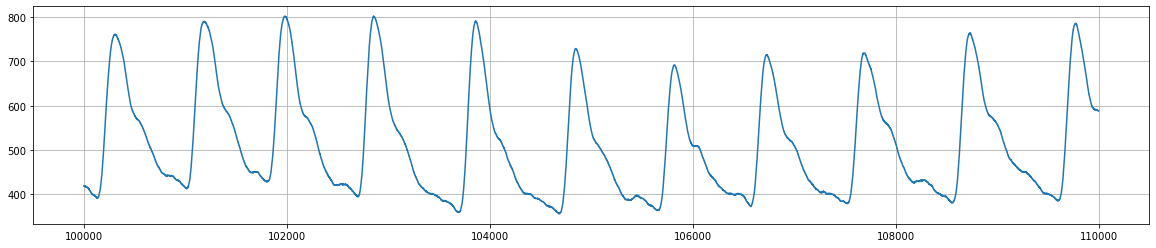

In [46]:
plt.figure(figsize=(20,4))
plt.plot(np.array(range(0,len(pul_np)))[10**5:(10**5)+(10**4)], pul_np[10**5:(10**5)+(10**4)])
plt.grid(True)

plt.show()

In [47]:
def moving_average(x,w):
    return np.convolve(x,np.ones(w),'valid') / w

In [48]:
smooth_pul = moving_average(sensors[3], 200)

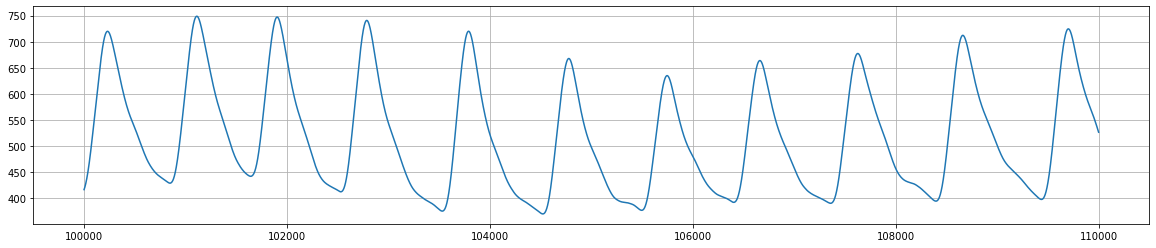

In [49]:
plt.figure(figsize=(20,4))
plt.plot(np.array(range(0,len(smooth_pul)))[10**5:(10**5)+(10**4)], smooth_pul[10**5:(10**5)+(10**4)])
plt.grid(True)

plt.show()

In [9]:
# plot them over time
eeg_np = np.array(list(enumerate(eeg_array)))
emg_np = np.array(list(enumerate(emg_array)))
eog_np = np.array(list(enumerate(eog_array)))
pul_np = np.array(list(enumerate(pul_array)))
eda_np = np.array(list(enumerate(eda_array)))

In [10]:
eeg_np.shape, emg_np.shape, eog_np.shape, pul_np.shape, eda_np.shape

((1659750, 2), (1659750, 2), (1659750, 2), (1659750, 2), (1659750, 2))

In [11]:
# index to add xtickers
first = eeg_np.shape[0]//5
print(first)

331950


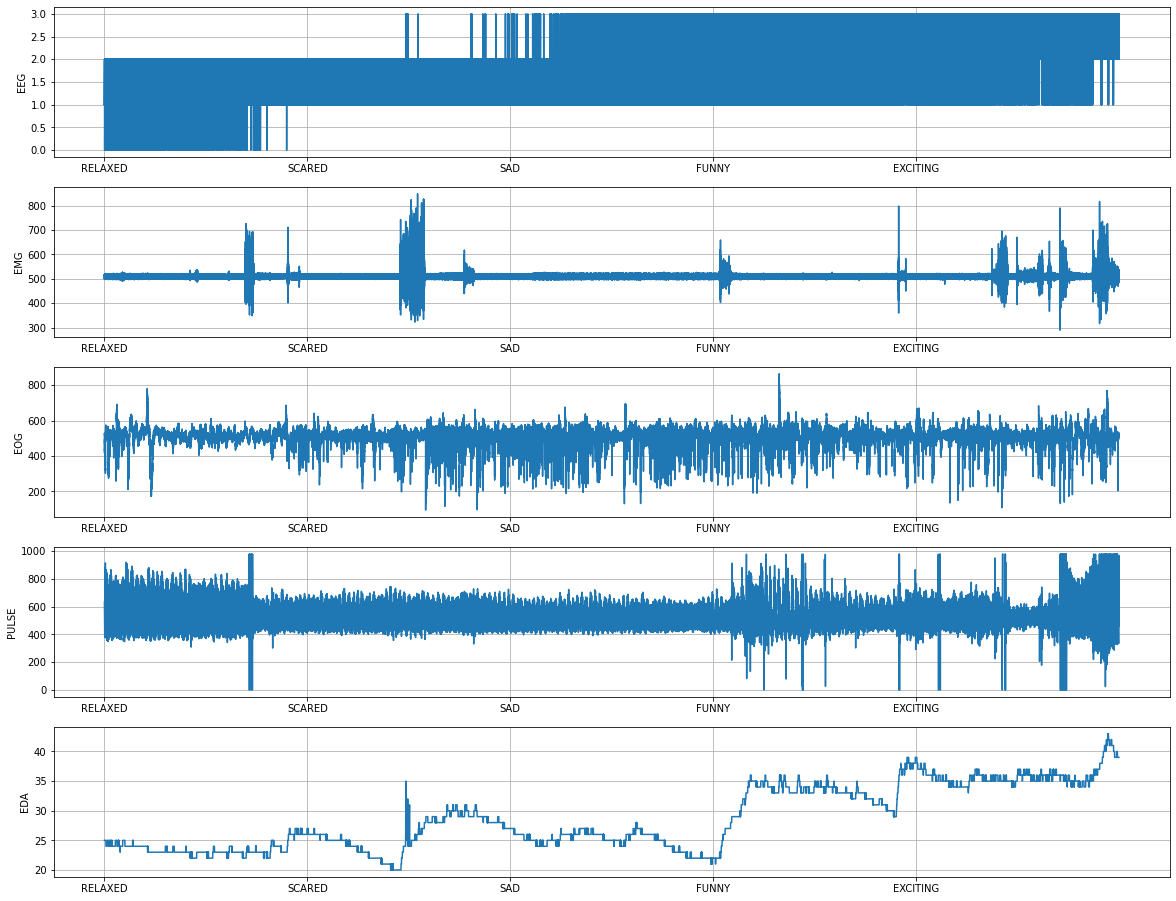

In [12]:
plt.figure(figsize=(20,16))
sensors = [eeg_np, emg_np, eog_np, pul_np, eda_np]

for i, name in enumerate(["EEG", "EMG", "EOG", "PULSE", "EDA"]):
    plt.subplot(5, 1, i+1)
    plt.plot(*sensors[i].T)
    plt.grid(True)
    plt.xticks([0, first, first*2, first*3, first*4], ["RELAXED", "SCARED", "SAD", "FUNNY", "EXCITING"])
    plt.ylabel(name)

plt.show()